In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [2]:
users_df = pd.read_csv("data/users_2024_fixed.csv")
users_df["inviter_id"] = users_df["inviter_id"].astype("Int64")
users_df


,user_id,username,joined_date,inviter_id
0,1,Brooke Castillo,01/01/2024,<NA>
1,2,Kathleen Murphy,01/01/2024,<NA>
2,3,Julia Garcia,01/01/2024,<NA>
3,4,Jessica Bond,01/01/2024,<NA>
4,5,Zachary Keller,01/01/2024,<NA>
...,...,...,...,...
5582,5583,Cheryl Huynh,15/01/2025,3237
5583,5584,Carolyn Carson,15/01/2025,2323
5584,5585,Matthew Wright,15/01/2025,1944
5585,5586,Joseph Harris,15/01/2025,1851


In [3]:
users_df["joined_date"] = pd.to_datetime(users_df["joined_date"], format="%d/%m/%Y")
users_df = users_df[users_df["joined_date"].dt.year == 2024]

users_df


,user_id,username,joined_date,inviter_id
0,1,Brooke Castillo,2024-01-01,<NA>
1,2,Kathleen Murphy,2024-01-01,<NA>
2,3,Julia Garcia,2024-01-01,<NA>
3,4,Jessica Bond,2024-01-01,<NA>
4,5,Zachary Keller,2024-01-01,<NA>
...,...,...,...,...
5383,5384,Alexis Fields,2024-12-31,2043
5384,5385,Frederick Murray,2024-12-31,3523
5385,5386,Kelsey White,2024-12-31,870
5386,5387,Kelsey White,2024-12-31,1239


<ipython-input-4-6b77ca89438f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_df["referral_1st_tier"] = users_df["user_id"].map(first_tier).fillna(0).astype("Int64")


<Axes: title={'center': 'Distribution of Users By Referral and Non Referrals'}>

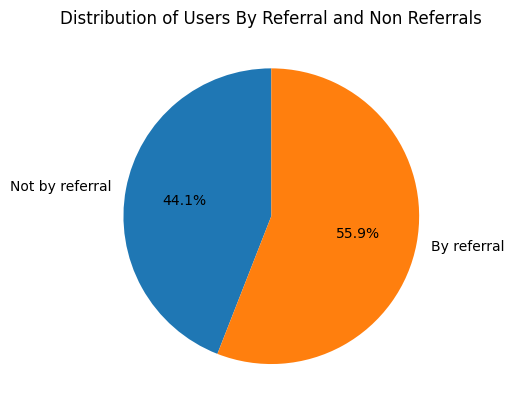

In [4]:
# users_df["n_of_referrals"]

# for user in inviter_id
first_tier = users_df.groupby("inviter_id").size()
users_df["referral_1st_tier"] = users_df["user_id"].map(first_tier).fillna(0).astype("Int64")

by_invite = users_df.groupby(users_df["inviter_id"].notnull()).size()


by_invite.plot.pie(
    labels=["Not by referral", "By referral"], 
    autopct='%1.1f%%', 
    startangle=90, 
    title="Distribution of Users By Referral and Non Referrals"
)

<Axes: title={'center': 'Distribution of Users Who Has Referred and Has Not Referred'}>

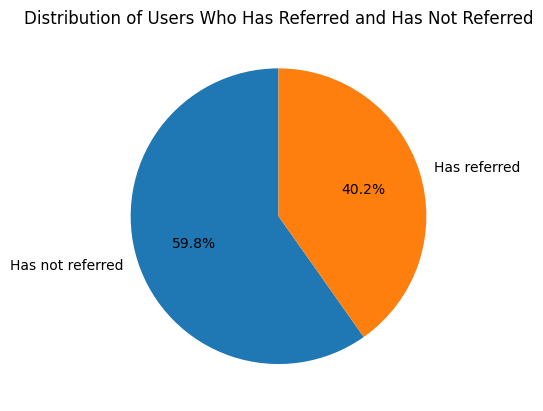

In [5]:
has_invited = users_df.groupby(users_df["referral_1st_tier"] > 0).size()

users_df

has_invited.plot.pie(
    labels=["Has not referred", "Has referred"], 
    autopct='%1.1f%%', 
    startangle=90, 
    title="Distribution of Users Who Has Referred and Has Not Referred"
)

In [6]:
def get_2nd_tier(user):
    second_tier = users_df[users_df["inviter_id"].isin(
        users_df[users_df["inviter_id"] == user]["user_id"])].shape[0]
    return second_tier

users_df["referral_2nd_tier"] = users_df["user_id"].apply(get_2nd_tier)

users_df
        

    #kalo inviter_id ada di kolom user_id, maka tier 1 user id itu nambah 1
    #cek 2nd tier: pertama liat dulu 1st tier dari yg user_idnya ada di inviter_id
    #cek yg inviter_id nya ada di first tier

<ipython-input-6-938a2d4fbf9c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_df["referral_2nd_tier"] = users_df["user_id"].apply(get_2nd_tier)


,user_id,username,joined_date,inviter_id,referral_1st_tier,referral_2nd_tier
0,1,Brooke Castillo,2024-01-01,<NA>,1,0
1,2,Kathleen Murphy,2024-01-01,<NA>,0,0
2,3,Julia Garcia,2024-01-01,<NA>,0,0
3,4,Jessica Bond,2024-01-01,<NA>,3,2
4,5,Zachary Keller,2024-01-01,<NA>,2,2
...,...,...,...,...,...,...
5383,5384,Alexis Fields,2024-12-31,2043,0,0
5384,5385,Frederick Murray,2024-12-31,3523,0,0
5385,5386,Kelsey White,2024-12-31,870,0,0
5386,5387,Kelsey White,2024-12-31,1239,0,0


In [7]:
users_df["total_rewards"] = users_df["referral_1st_tier"]*5 + users_df["referral_2nd_tier"]*3
total_rewards_sum = users_df["total_rewards"].sum()
print(f"Total amount spent on referral rewards: {total_rewards_sum} USD")


<ipython-input-7-f29d8654cdb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_df["total_rewards"] = users_df["referral_1st_tier"]*5 + users_df["referral_2nd_tier"]*3


Total amount spent on referral rewards: 18328 USD


In [8]:
# Calculate the total number of users where by_invite is True (inviter_id is not null)
total_by_invite = users_df["inviter_id"].notnull().sum()

# Calculate CAC (Customer Acquisition Cost)
CAC = total_rewards_sum / total_by_invite

# Print the result
print(f"CAC: {CAC}")


CAC: 6.080955540809556


<ipython-input-12-c31fac1677b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_df["join_month"] = users_df["joined_date"].dt.to_period("M")


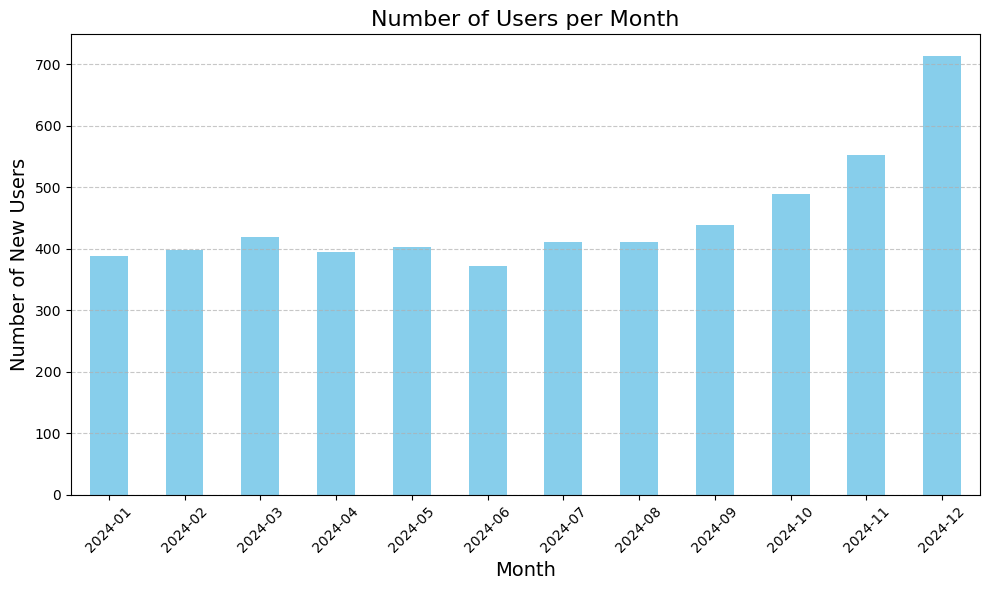

In [12]:
# Create a new column for the month and year of joining
users_df["join_month"] = users_df["joined_date"].dt.to_period("M")

# Count the number of new users per month
users_per_month = users_df.groupby("join_month").size()

# Plot the chart
plt.figure(figsize=(10, 6))
users_per_month.plot(kind="bar", color="skyblue")
plt.title("Number of Users per Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Number of New Users", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [17]:
users_df["total_refcost"] = 0

# 1-st tier referral = 3 USD
users_df.loc[users_df["inviter_id"].notnull(), "total_refcost"] = 3

#  2-ND tier referral = 5 USD

second_tier = users_df.merge(
    users_df[["user_id", "inviter_id"]].rename(columns={"user_id": "first_tier_user", "inviter_id": "second_tier_inviter"}),
    left_on="inviter_id",
    right_on="first_tier_user",
    how="inner"
)


users_df.loc[users_df["user_id"].isin(second_tier["user_id"]), "total_refcost"] = 5


users_df


<ipython-input-17-89361ca31f6f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_df["total_refcost"] = 0


,user_id,username,joined_date,inviter_id,referral_1st_tier,referral_2nd_tier,total_rewards,join_month,total_refcost
0,1,Brooke Castillo,2024-01-01,<NA>,1,0,5,2024-01,0
1,2,Kathleen Murphy,2024-01-01,<NA>,0,0,0,2024-01,0
2,3,Julia Garcia,2024-01-01,<NA>,0,0,0,2024-01,0
3,4,Jessica Bond,2024-01-01,<NA>,3,2,21,2024-01,0
4,5,Zachary Keller,2024-01-01,<NA>,2,2,16,2024-01,0
...,...,...,...,...,...,...,...,...,...
5383,5384,Alexis Fields,2024-12-31,2043,0,0,0,2024-12,5
5384,5385,Frederick Murray,2024-12-31,3523,0,0,0,2024-12,5
5385,5386,Kelsey White,2024-12-31,870,0,0,0,2024-12,5
5386,5387,Kelsey White,2024-12-31,1239,0,0,0,2024-12,5


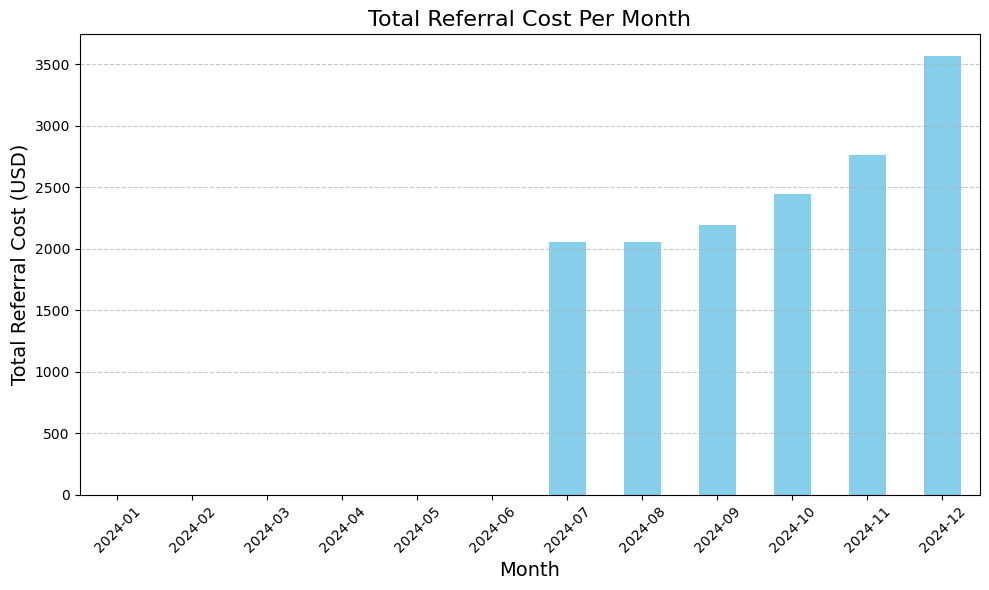

In [18]:
monthly_refcost = users_df.groupby("join_month")["total_refcost"].sum()


plt.figure(figsize=(10, 6))
monthly_refcost.plot(kind="bar", color="skyblue")
plt.title("Total Referral Cost Per Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Referral Cost (USD)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()